# Multiple time series data

Some code for plotting and basic descriptions of multiple time series data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load data and create the proper column for time series
flights = sns.load_dataset('flights')
flights['year'] = flights['year'].astype('str')
flights['month'] = flights['month'].astype('str')
flights['date'] = flights['month'] + ' ' + flights['year']


flights['date'] = pd.to_datetime(flights['date'])

# Set the index to be the date. This is important
flights = flights.set_index('date')
flights = flights[['passengers']]

flights.head()

,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
# Modifying some of the passenger data
flights['kids'] = round(flights['passengers']/50) + random.randint(0, 2)
flights['baggage'] = flights['passengers'] - random.randint(10, 100)

In [25]:
flights.describe()

,passengers,kids,baggage
count,144.000000,144.000000,144.000000
mean,280.298611,5.569444,203.298611
std,119.966317,2.352362,119.966317
min,104.000000,2.000000,27.000000
25%,180.000000,4.000000,103.000000
50%,265.500000,5.000000,188.500000
75%,360.500000,7.000000,283.500000
max,622.000000,12.000000,545.000000


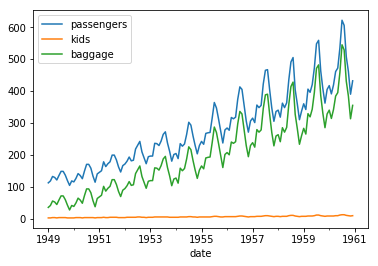

In [26]:
flights.plot()

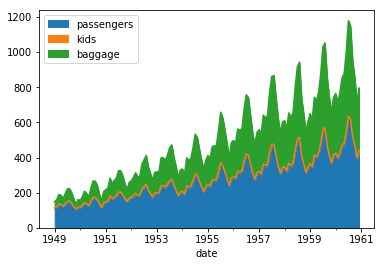

In [28]:
flights.plot.area()

### Summary Statistics to Plots

In [60]:
flights_mean = pd.DataFrame(flights.mean()).transpose()
flights_mean = flights_mean.rename(index={0:'mean'})

In [61]:
flights_mean

,passengers,kids,baggage
mean,280.298611,5.569444,203.298611


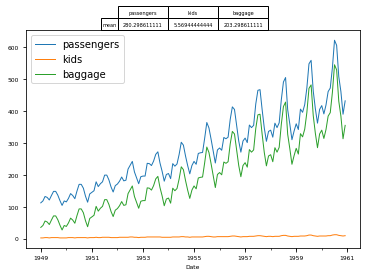

In [62]:
ax = flights.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

# Add summary table information to the plot
ax.table(cellText=flights_mean.values,
         colWidths = [0.15]*len(flights_mean.columns),
         rowLabels=flights_mean.index,
         colLabels=flights_mean.columns,
         loc='top')

### Subplots

Use subplots if the scale of your time series are very different. For example, the kids time series of the above plot doesn't move because of how small it is in comparison to passengers and baggage. Subplots can separate these out

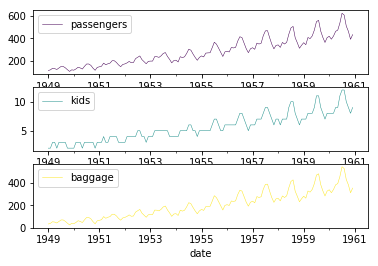

In [66]:
# How to create multiple plots so scaling issues are minimized
flights.plot(subplots=True, 
          layout=(3,1), 
          sharex=False, 
          sharey=False, 
          colormap='viridis', 
          fontsize=10, 
          legend=True, 
          linewidth=0.5)

plt.show()

### Correlations in Time-Series

The data I used here are all based on passengers, so correlation should be near 1.

Correlation Types:
1. Pearson - Linear
2. Kendall - Nonlinear
3. Spearman - Nonlinear

In [71]:
flight_corr = flights.corr()
flight_corr

,passengers,kids,baggage
passengers,1.000000,0.993045,1.000000
kids,0.993045,1.000000,0.993045
baggage,1.000000,0.993045,1.000000


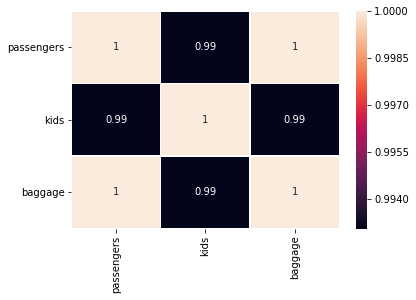

In [74]:
# Making a heatmat
sns.heatmap(flight_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

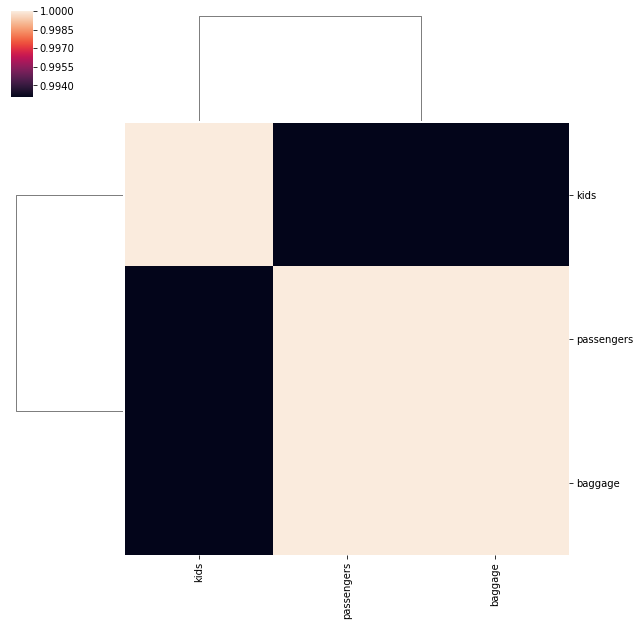

In [78]:
# Making a cluster heatmat
fig = sns.clustermap(flight_corr,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(10, 10))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()